In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import matplotlib.tri as tri
from dataset import *

In [2]:
df_train = pd.read_pickle('microstucture.pkl')
df_train.head()

index     curve_n                                         curve_area  \
0      0  [1, 3, 54]  [44.980112526027035, 47.16146038289884, 249.58...   
1      1   [4, 8, 0]       [278.0840614361895, 144.40479803053336, 0.0]   
2      2  [2, 13, 0]        [125.1913778438531, 215.9813556447589, 0.0]   
3      3  [3, 9, 29]  [147.8599102513112, 162.24778265410401, 130.09...   
4      4  [4, 4, 34]  [214.29927185031744, 67.99614832644124, 148.78...   

                                               sizes  \
0  {16: [[11.634028130284323, 5.182346340744194]]...   
1  {16: [[10.922469597792166, 7.119867552525796],...   
2  {16: [[11.30634428058544, 8.841091265113812], ...   
3  {16: [[8.744291518313723, 3.9869423477763792],...   
4  {16: [[8.53137439993541, 7.901661968749836], [...   

                                              ratios  \
0  {16: [2.2449345075253415], 8: [1.6455719360013...   
1  {16: [1.534083256073687, 1.3558929490918499, 1...   
2  {16: [1.2788403537015056, 1.1453809717470627],...   
3  {16: [2.1932324963742302, 1.872639248932646, 1...   
4  {16: [1.0796936687086862, 1.7187243032645076, ...   

                                           roundness    damage  shrinkage  \
0  {16: [0.6858273932924801], 8: [0.7353582880135...  0.204720  -0.000794   
1  {16: [0.6918901640856667, 0.6835016016191318, ...  0.221336  -0.000548   
2  {16: [0.8122733416691932, 0.7154878314704103],...  0.197751  -0.000681   
3  {16: [0.6374008046284033, 0.595356037624701, 0...  0.244860  -0.000608   
4  {16: [0.7162784809176268, 0.6393809837372455, ...  0.232117  -0.000644   

   stiffness_init  stiffness_end  stiffness_ratio  mortar_damage  \
0        27534.98       13605.44         0.494115       0.307259   
1        30629.28       13322.23         0.434951       0.376798   
2        28962.97       13278.01         0.458448       0.296556   
3        29644.40       12190.48         0.411224       0.429490   
4        29301.05       12944.98         0.441792       0.400875   

   aggregate_ratio  curve_16   curve_8   curve_4  cluster  
0         0.333721  0.131625  0.138008  0.730368        1  
1         0.412587  0.658204  0.341796  0.000000        2  
2         0.333176  0.366944  0.633056  0.000000        2  
3         0.429883  0.335893  0.368578  0.295530        1  
4         0.420973  0.497126  0.157736  0.345138        1

Text(0.98, 0.1, '100% grade 16')

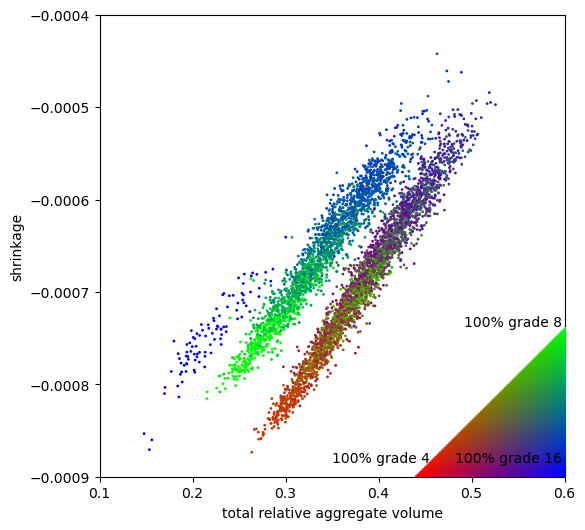

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df_train['aggregate_ratio'][:5000], df_train['shrinkage'][:5000], s=1, c=df_train[['curve_4','curve_8','curve_16']][:5000].to_numpy())
ax.set_xlabel('total relative aggregate volume')
ax.set_ylabel('shrinkage')
ax.set_xlim([0.1, 0.6])
ax.set_ylim([-0.0009, -0.0004])

# Create a color gradient for the triangular colormap
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
mask = grid_y > grid_x  # Mask to keep only the triangle
r = 1 - grid_x
g = grid_y
b = 1 - (r + g)
rgb_colormap = np.dstack((r, g, b))
rgb_colormap[mask] = 1  # Set outside values to white

# Overlay the colormap
ax_inset = fig.add_axes([0.65, 0.11, 0.25, 0.25])  # Position inset triangle
ax_inset.imshow(rgb_colormap, extent=[0, 1, 0, 1], origin="lower")
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_frame_on(False)

# Annotate RGB corners
ax_inset.text(0.98, 1.0, '100% grade 8', color='black', ha='right', fontsize=10)
ax_inset.text(0.1, 0.1, '100% grade 4', color='black', ha='right', fontsize=10)
ax_inset.text(0.98, 0.1, '100% grade 16', color='black', ha='right', fontsize=10)

In [3]:
df = pd.read_pickle('microstucture_big.pkl')
df.head()

curve_n                                     curve_area  \
0  [1, 13, 0]  [105.80074636770647, 227.96328911964014, 0.0]   
1   [4, 0, 0]                  [278.0806039902927, 0.0, 0.0]   
2   [4, 0, 0]                   [313.421728531106, 0.0, 0.0]   
3  [3, 10, 0]  [218.03944019512616, 173.47923426585353, 0.0]   
4   [4, 5, 0]    [299.7357110559889, 69.95675483906378, 0.0]   

                                               sizes  \
0  {16: [[12.156105356917523, 10.623884723487098]...   
1  {16: [[13.2100775605406, 8.901632629103986], [...   
2  {16: [[14.478128114885118, 7.07690334800868], ...   
3  {16: [[10.690182333262214, 9.950449294945646],...   
4  {16: [[11.825311336277718, 7.229526295980998],...   

                                              ratios  \
0  {16: [1.1442241395977328], 8: [1.4751999563701...   
1  {16: [1.4840061493158128, 1.1343764452308507, ...   
2  {16: [2.045828154338015, 1.7307378409831589, 1...   
3  {16: [1.0743416720581973, 1.5227016310172952, ...   
4  {16: [1.6356965660186595, 2.5639894808309918, ...   

                                           roundness    damage  shrinkage  \
0  {16: [0.79153385961529], 8: [0.605976146544928...  0.192238  -0.000665   
1  {16: [0.7175189460203348, 0.8022948062440893, ...  0.175496  -0.000688   
2  {16: [0.7837420397213821, 0.7111899015206651, ...  0.170600  -0.000634   
3  {16: [0.8521819843178768, 0.7467008904049787, ...  0.210610  -0.000601   
4  {16: [0.7855563249650631, 0.4722256149583713, ...  0.191100  -0.000615   

   stiffness_ratio  aggregate_ratio  curve_16   curve_8  curve_4  \
0         0.466355         0.325941  0.316993  0.683007      0.0   
1         0.501612         0.271563  1.000000  0.000000      0.0   
2         0.480870         0.306076  1.000000  0.000000      0.0   
3         0.446522         0.382342  0.556907  0.443093      0.0   
4         0.445978         0.361028  0.810770  0.189230      0.0   

   mortar_damage  interface  
0       0.285195        947  
1       0.240921        534  
2       0.245848        546  
3       0.340982        970  
4       0.299074        812

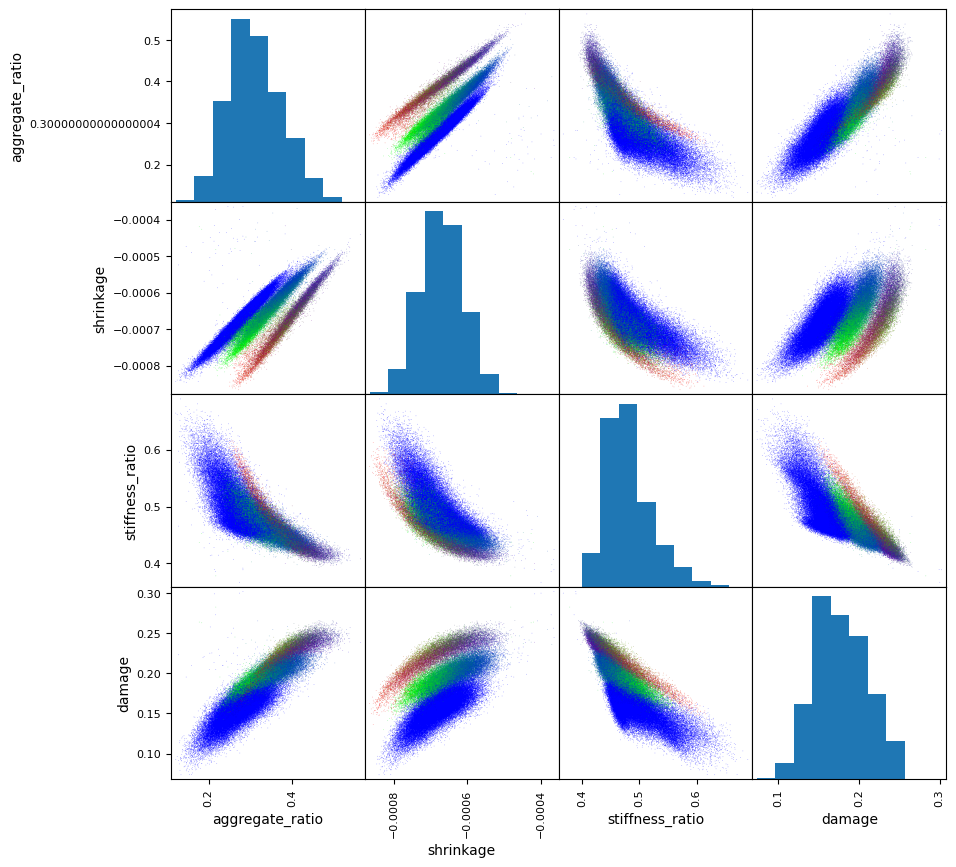

In [164]:
pd.plotting.scatter_matrix(df[['aggregate_ratio', 'shrinkage', 'stiffness_ratio', 'damage']], figsize=(10, 10), diagonal='hist', c=df[['curve_4','curve_8','curve_16']].to_numpy(), s=1)

plt.show()

Text(0.98, 0.1, '100% grade 16')

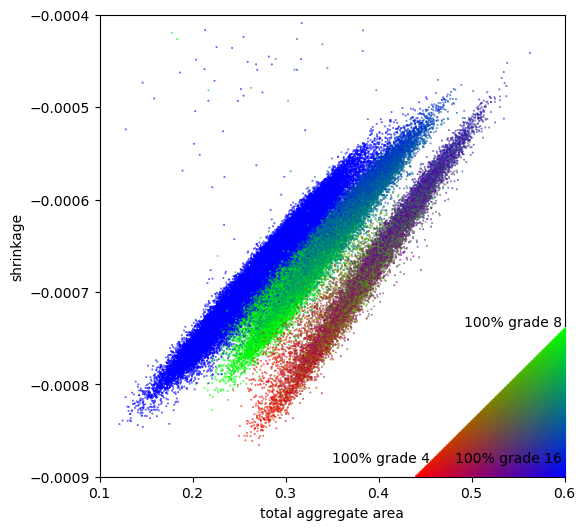

In [155]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio'], df['shrinkage'], s=0.1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('total aggregate area')
ax.set_ylabel('shrinkage')
ax.set_xlim([0.1, 0.6])
ax.set_ylim([-0.0009, -0.0004])

# Create a color gradient for the triangular colormap
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
mask = grid_y > grid_x  # Mask to keep only the triangle
r = 1 - grid_x
g = grid_y
b = 1 - (r + g)
rgb_colormap = np.dstack((r, g, b))
rgb_colormap[mask] = 1  # Set outside values to white

# Overlay the colormap
ax_inset = fig.add_axes([0.65, 0.11, 0.25, 0.25])  # Position inset triangle
ax_inset.imshow(rgb_colormap, extent=[0, 1, 0, 1], origin="lower")
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_frame_on(False)

# Annotate RGB corners
ax_inset.text(0.98, 1.0, '100% grade 8', color='black', ha='right', fontsize=10)
ax_inset.text(0.1, 0.1, '100% grade 4', color='black', ha='right', fontsize=10)
ax_inset.text(0.98, 0.1, '100% grade 16', color='black', ha='right', fontsize=10)

Text(0.98, 0.1, '100% grade 16')

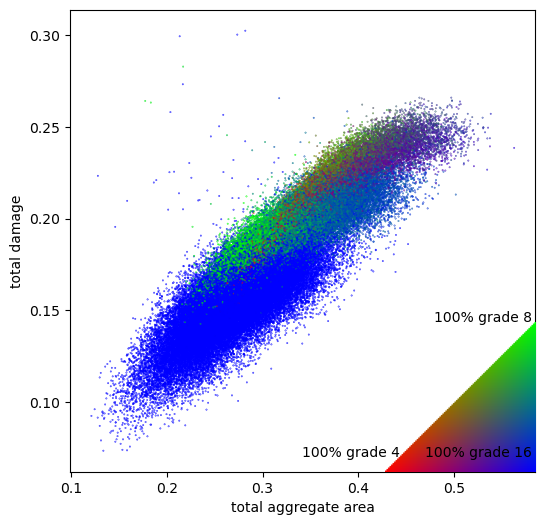

In [156]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio'], df['damage'], s=0.1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('total aggregate area')
ax.set_ylabel('total damage')
#ax.set_xlim([0.1, 0.6])
#ax.set_ylim([-0.0009, -0.0004])

# Create a color gradient for the triangular colormap
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
mask = grid_y > grid_x  # Mask to keep only the triangle
r = 1 - grid_x
g = grid_y
b = 1 - (r + g)
rgb_colormap = np.dstack((r, g, b))
rgb_colormap[mask] = 1  # Set outside values to white

# Overlay the colormap
ax_inset = fig.add_axes([0.65, 0.11, 0.25, 0.25])  # Position inset triangle
ax_inset.imshow(rgb_colormap, extent=[0, 1, 0, 1], origin="lower")
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_frame_on(False)

# Annotate RGB corners
ax_inset.text(0.98, 1.0, '100% grade 8', color='black', ha='right', fontsize=10)
ax_inset.text(0.1, 0.1, '100% grade 4', color='black', ha='right', fontsize=10)
ax_inset.text(0.98, 0.1, '100% grade 16', color='black', ha='right', fontsize=10)

Text(0.98, 0.1, '100% grade 16')

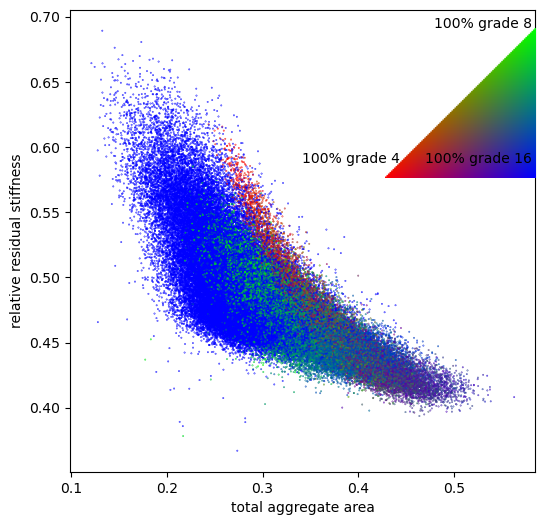

In [157]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio'], df['stiffness_ratio'], s=0.1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('total aggregate area')
ax.set_ylabel('relative residual stiffness')
#ax.set_xlim([0.1, 0.6])
#ax.set_ylim([-0.0009, -0.0004])

# Create a color gradient for the triangular colormap
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
mask = grid_y > grid_x  # Mask to keep only the triangle
r = 1 - grid_x
g = grid_y
b = 1 - (r + g)
rgb_colormap = np.dstack((r, g, b))
rgb_colormap[mask] = 1  # Set outside values to white

# Overlay the colormap
ax_inset = fig.add_axes([0.65, 0.6, 0.25, 0.25])  # Position inset triangle
ax_inset.imshow(rgb_colormap, extent=[0, 1, 0, 1], origin="lower")
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_frame_on(False)

# Annotate RGB corners
ax_inset.text(0.98, 1.0, '100% grade 8', color='black', ha='right', fontsize=10)
ax_inset.text(0.1, 0.1, '100% grade 4', color='black', ha='right', fontsize=10)
ax_inset.text(0.98, 0.1, '100% grade 16', color='black', ha='right', fontsize=10)

Text(0.98, 0.1, '100% grade 16')

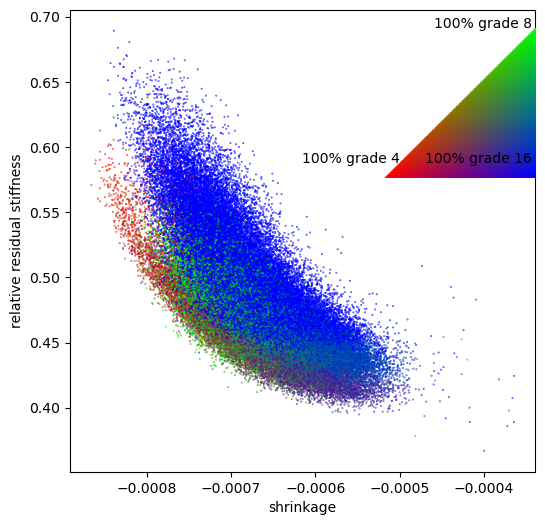

In [158]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['shrinkage'], df['stiffness_ratio'], s=0.1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('shrinkage')
ax.set_ylabel('relative residual stiffness')
#ax.set_xlim([0.1, 0.6])
#ax.set_ylim([-0.0009, -0.0004])

# Create a color gradient for the triangular colormap
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
mask = grid_y > grid_x  # Mask to keep only the triangle
r = 1 - grid_x
g = grid_y
b = 1 - (r + g)
rgb_colormap = np.dstack((r, g, b))
rgb_colormap[mask] = 1  # Set outside values to white

# Overlay the colormap
ax_inset = fig.add_axes([0.65, 0.6, 0.25, 0.25])  # Position inset triangle
ax_inset.imshow(rgb_colormap, extent=[0, 1, 0, 1], origin="lower")
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_frame_on(False)

# Annotate RGB corners
ax_inset.text(0.98, 1.0, '100% grade 8', color='black', ha='right', fontsize=10)
ax_inset.text(0.1, 0.1, '100% grade 4', color='black', ha='right', fontsize=10)
ax_inset.text(0.98, 0.1, '100% grade 16', color='black', ha='right', fontsize=10)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio'], df['damage'], s=1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('total relative aggregate volume')
ax.set_ylabel('damage')
#ax.set_xlim([0.1, 0.6])
#ax.set_ylim([-0.0009, -0.0004])

# Create a color gradient for the triangular colormap
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
mask = grid_y > grid_x  # Mask to keep only the triangle
r = 1 - grid_x
g = grid_y
b = 1 - (r + g)
rgb_colormap = np.dstack((r, g, b))
rgb_colormap[mask] = 1  # Set outside values to white

# Overlay the colormap
ax_inset = fig.add_axes([0.65, 0.11, 0.25, 0.25])  # Position inset triangle
ax_inset.imshow(rgb_colormap, extent=[0, 1, 0, 1], origin="lower")
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_frame_on(False)

# Annotate RGB corners
ax_inset.text(0.98, 1.0, '100% grade 8', color='black', ha='right', fontsize=10)
ax_inset.text(0.1, 0.1, '100% grade 4', color='black', ha='right', fontsize=10)
ax_inset.text(0.98, 0.1, '100% grade 16', color='black', ha='right', fontsize=10)

Text(0.5, 0, 'volume')

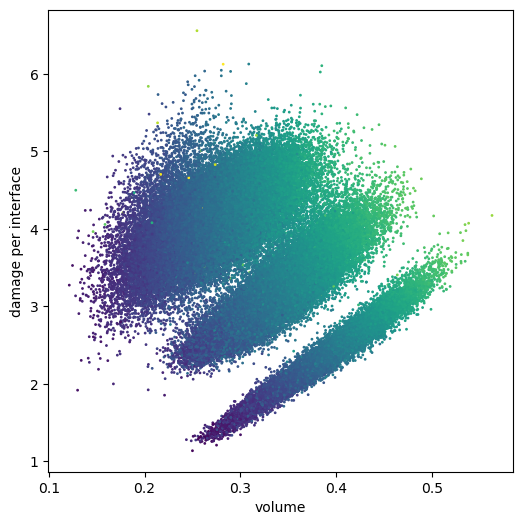

In [128]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio'], df['mortar_damage']/df['interface'], s=1, c= df['shrinkage'])
ax.set_ylabel('damage per interface')
ax.set_xlabel('volume')
#ax.set_xlim([0.1, 0.6])
#ax.set_ylim([-0.0009, -0.0004])

Text(0.5, 0, 'volume')

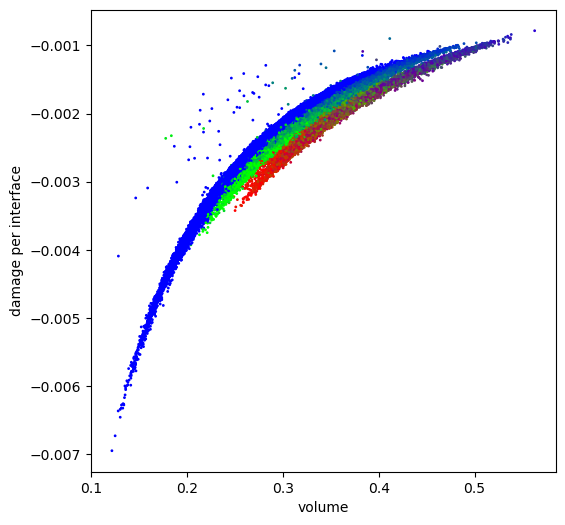

In [135]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio'], df['shrinkage']/df['aggregate_ratio'], s=1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_ylabel('damage per interface')
ax.set_xlabel('volume')

Text(0, 0.5, 'damage per interface')

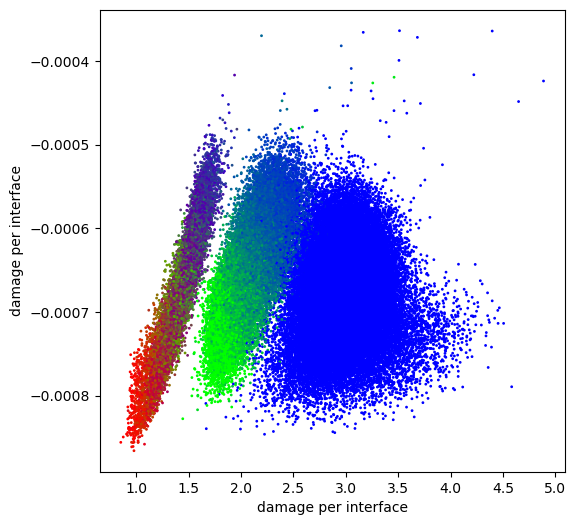

In [114]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['damage']/df['interface'], df['shrinkage'], s=1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('damage per interface')
ax.set_ylabel('damage per interface')
#ax.set_xlim([0.1, 0.6])
#ax.set_ylim([-0.0009, -0.0004])

In [5]:
df['interface'] = df['interface'] / 99**2

(-0.0009, -0.0004)

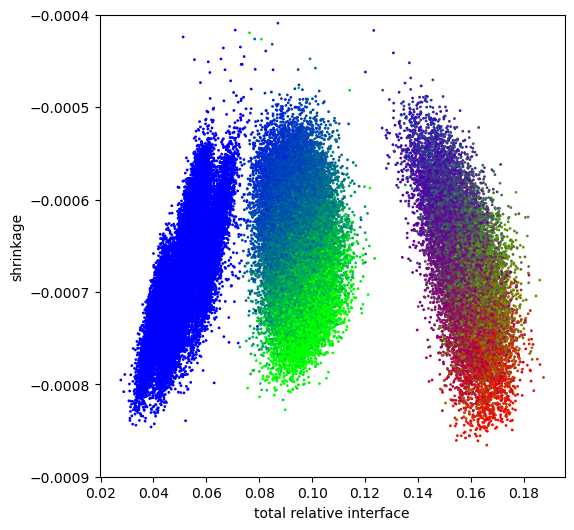

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['interface'], df['shrinkage'], s=1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('total relative interface')
ax.set_ylabel('shrinkage')
#ax.set_xlim([0.1, 0.6])
ax.set_ylim([-0.0009, -0.0004])

Text(0, 0.5, 'interface')

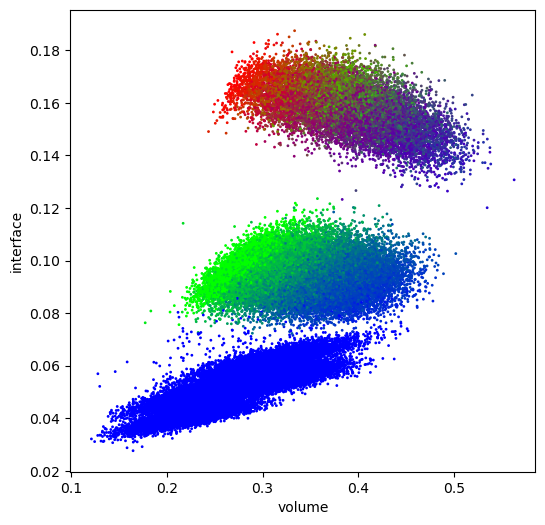

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio'], df['interface'], s=1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
x = np.linspace(0.1, 0.6, 20)
y = 2 * (np.sqrt(np.pi * x))
#ax.plot(x, y, 'k')
ax.set_xlabel('volume')
ax.set_ylabel('interface')

Text(0, 0.5, 'shrinkage')

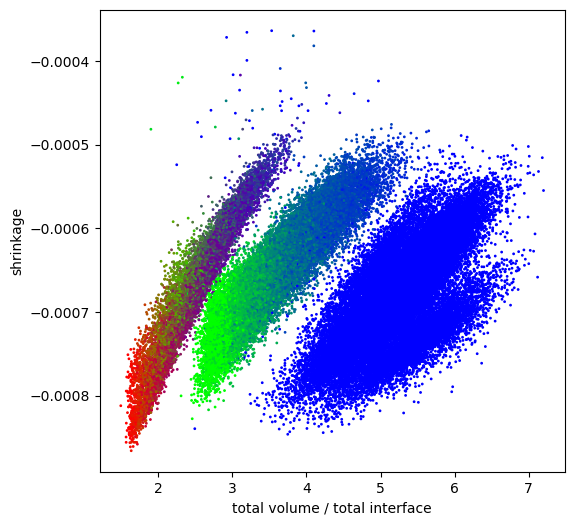

In [26]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio']/df['interface'], df['shrinkage'], s=1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('total volume / total interface')
ax.set_ylabel('shrinkage')
#ax.set_xlim([0.1, 0.6])
#ax.set_ylim([-0.0009, -0.0004])

Text(0, 0.5, 'interface')

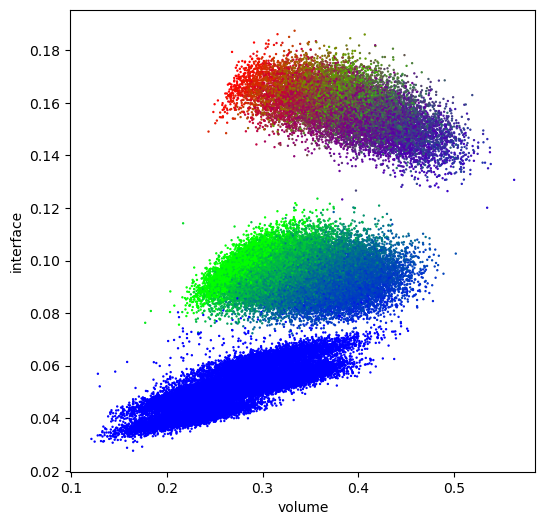

In [136]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio'], df['interface'], s=0.5, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('volume')
ax.set_ylabel('interface')

Text(0, 0.5, 'shrinkage')

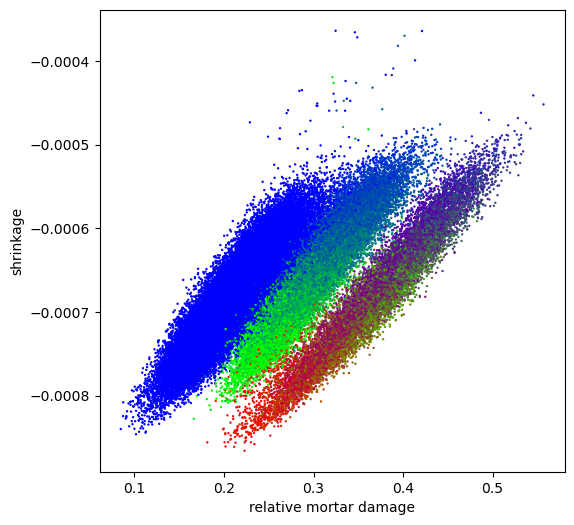

In [51]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['mortar_damage'], df['shrinkage'], s=0.5, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('relative mortar damage')
ax.set_ylabel('shrinkage')

Text(0, 0.5, 'shrinkage')

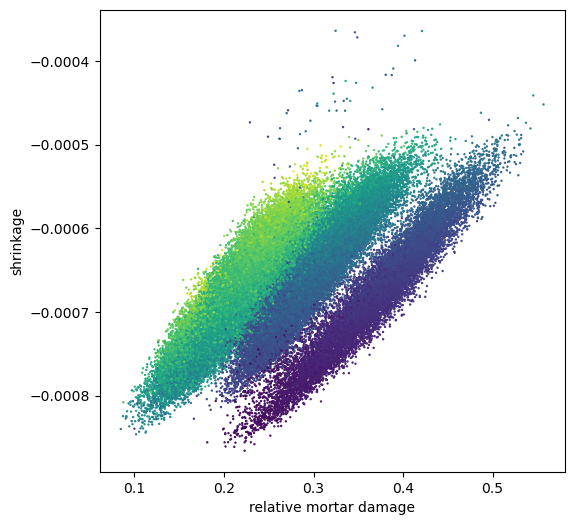

In [56]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['mortar_damage'], df['shrinkage'], s=0.5, c=df['aggregate_ratio']/df['interface'])
ax.set_xlabel('relative mortar damage')
ax.set_ylabel('shrinkage')

Text(0, 0.5, 'damage')

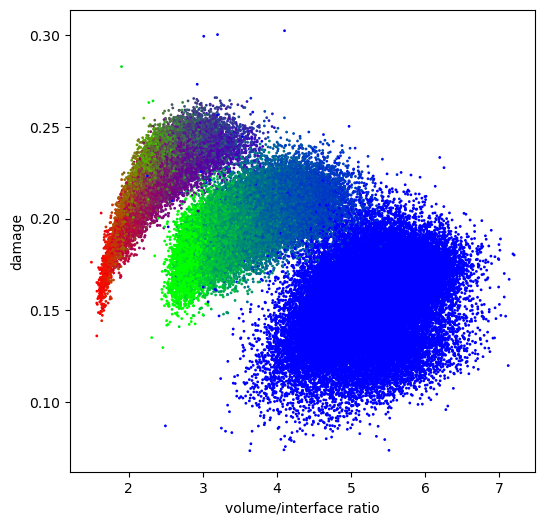

In [137]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['aggregate_ratio']/df['interface'], df['damage'], s=1, c=df[['curve_4','curve_8','curve_16']].to_numpy())
ax.set_xlabel('volume/interface ratio')
ax.set_ylabel('damage')
#ax.set_xlim([0.1, 0.6])
#ax.set_ylim([-0.0009, -0.0004])

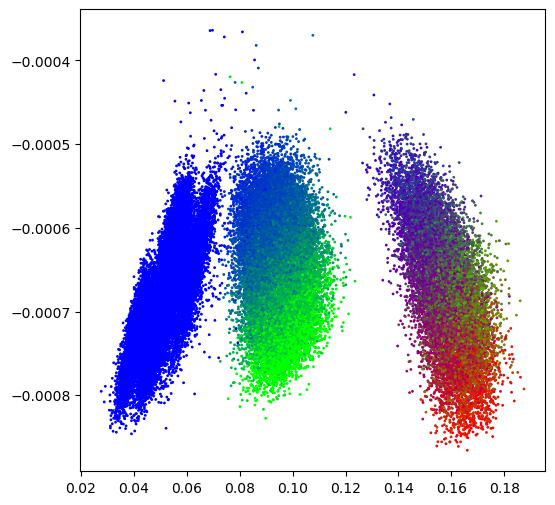

In [138]:
ig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['interface'], df['shrinkage'], s=1, c=df[['curve_4','curve_8','curve_16']].to_numpy())

In [57]:
cluster_1 = df[(df['curve_8']==0) & (df['curve_4']==0)]
cluster_2 = df[(df['curve_8']!=0) & (df['curve_4']==0)]
cluster_3 = df[(df['curve_4']!=0)]

In [73]:
X = np.array(cluster_1[['aggregate_ratio']])
Y = np.array(cluster_1[['shrinkage']]) / (0.0001)
reg1 = LinearRegression().fit(X, Y)
x = np.linspace(0, 1, 10)
y = reg1.predict(x.reshape(-1,1)) * (0.0001)
print(reg1.score(X, Y))
a = reg1.coef_
b = reg1.intercept_

0.9373827119665216


Text(0, 0.5, 'shrinkage')

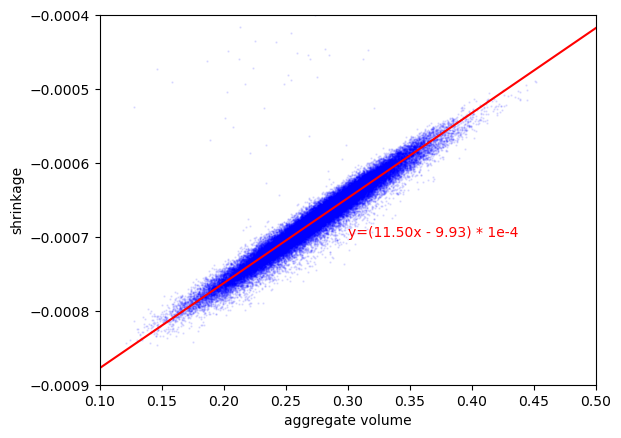

In [75]:
plt.scatter(cluster_1['aggregate_ratio'], cluster_1['shrinkage'], s=0.5, c='blue', alpha=0.1)
plt.plot(x, y, c='red')
plt.xlim([0.1, 0.5])
plt.ylim([-0.0009, -0.0004])
plt.text(0.3, -0.0007, f'y=({a[0,0]:1.2f}x - {-b[0]:1.2f}) * 1e-4', color='red')
plt.xlabel('aggregate volume')
plt.ylabel('shrinkage')

In [89]:
v_i = 0.5 * np.sqrt(cluster_1['aggregate_ratio'] / cluster_1['curve_n'].str[0] / np.pi) 
i = 2 * np.sqrt(cluster_1['aggregate_ratio'] * cluster_1['curve_n'].str[0] * np.pi)

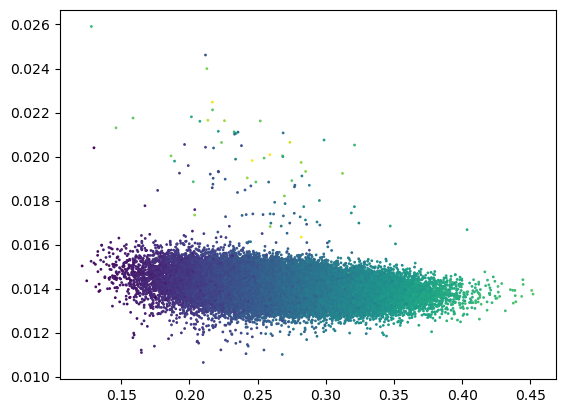

In [93]:
plt.scatter(cluster_1['aggregate_ratio'], cluster_1['interface']/i, s=1, c=cluster_1['shrinkage'])

In [171]:
X = np.array(cluster_2[['aggregate_ratio', 'curve_16']])
X[:,1] = X[:,0] * X[:,1]
Y = np.array(cluster_2[['shrinkage']]) / (0.0001)
reg2 = LinearRegression().fit(X, Y)
x = np.meshgrid(np.linspace(0.2, 0.5, 10), np.linspace(0, 0.45, 10))
x = np.vstack((x[0].flatten(), x[1].flatten())).T
y = reg2.predict(x) * (0.0001)
print(reg2.score(X, Y))
a = reg2.coef_
b = reg2.intercept_

0.927080102437172


Text(0.22, 0.4, 'z = (8.82x + 1.67y - 9.77) * 1e-4')

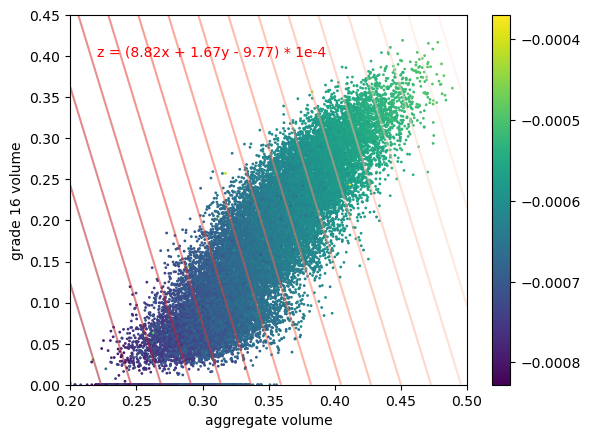

In [177]:
plt.scatter(cluster_2['aggregate_ratio'], cluster_2['curve_16']*cluster_2['aggregate_ratio'], s=1, c=cluster_2['shrinkage'])
plt.colorbar()
plt.tricontour(x[:,0], x[:,1], y.flatten(), levels=20, cmap='Reds_r', alpha=0.5)
plt.xlim([0.2, 0.5])
plt.ylim([0, 0.45])
plt.xlabel('aggregate volume')
plt.ylabel('grade 16 volume')
plt.text(0.22, 0.4, f'z = ({a[0,0]:1.2f}x + {a[0,1]:1.2f}y - {-b[0]:1.2f}) * 1e-4', color='red')

In [186]:
X = np.array(cluster_3[['aggregate_ratio', 'curve_4']])
X[:,1] = X[:,0] * X[:,1]
Y = np.array(cluster_3[['shrinkage']]) / (0.0001)
reg3 = LinearRegression().fit(X, Y)
x = np.meshgrid(np.linspace(0.25, 0.55, 10), np.linspace(0.05, 0.3, 10))
x = np.vstack((x[0].flatten(), x[1].flatten())).T
y = reg3.predict(x) * (0.0001)
print(reg3.score(X, Y))
a = reg3.coef_
b = reg3.intercept_

0.9483581842828928


Text(0.35, 0.27, 'z = (12.73x - 1.39y - 11.48) * 1e-4')

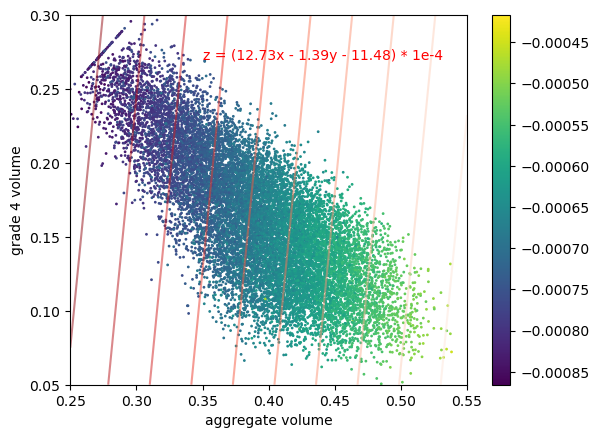

In [192]:
plt.scatter(cluster_3['aggregate_ratio'], cluster_3['curve_4']*cluster_3['aggregate_ratio'], s=1, c=cluster_3['shrinkage'])
plt.colorbar()
plt.tricontour(x[:,0], x[:,1], y.flatten(), levels=10, cmap='Reds_r', alpha=0.5)
plt.xlim([0.25, 0.55])
plt.ylim([0.05, 0.3])
plt.xlabel('aggregate volume')
plt.ylabel('grade 4 volume')
plt.text(0.35, 0.27, f'z = ({a[0,0]:1.2f}x - {-a[0,1]:1.2f}y - {-b[0]:1.2f}) * 1e-4', color='red')